# Defining Custom Functions and Modules

This notebook provides a basic overview of how to define custom functions and modules. The following description, copied from https://www.tutorialspoint.com/python/python_functions.htm (accessed 12/21/2018), describes custom Python functions.

> A function is a block of organized, reusable code that is used to perform a single, related action. Functions provide better modularity for your application and a high degree of code reusing.
>
> As you already know, Python gives you many built-in functions like print(), etc. but you can also create your own functions. These functions are called user-defined functions.
>
> You can define functions to provide the required functionality. Here are some simple rules that pertain to functions in Python.
>
> Rule 1. Function blocks begin with the keyword def followed by the function name and parentheses.
>
> Rule 2. Any input parameters or arguments should be placed within these parentheses. You can also define parameters inside these parentheses.
>
> Rule 3. The first statement of a function can be an optional statement - the documentation string of the function or *docstring*.
>
> Rule 4. The code block within every function starts with a colon (:) and is indented.
>
> Rule 5. The statement `return` exits a function, optionally passing back an expression to the caller. A return statement with no arguments is the same as `return None`.
>
> Rule 6. A function can return data as a result.

Essentially, a module is a collection of custom functions that are stored in a separate `.py` file and can be imported into projects as needed (similar to how we import packages such as Pandas or NumPy.


# Table of Contents
<a id="Table_of_Contents"> </a>

1. [Defining Custom Functions](#Defining_Custom_Functions)<br>
1.1 [Docstrings](#Docstrings)<br>
2. [Defining and Using Custom Modules](#Defining_Custom_Modules)<br>

The following code block imports the Numpy and Matplotlib packages, which we will be using in this demonstration.

[Back to Table of Contents](#Table_of_Contents)<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Defining Custom Functions
<a id="Defining_Custom_Functions"> </a>

In this section, we will demonstrate how to define and use custom functions using the concept of the *Economic Order Quantity* (EOQ). In inventory management, the EOQ is the order quantity that minimizes the total holding costs and ordering costs under the assumptions that demand occurs at a constant rate, the replenishment lead time is zero, and costs do not change over time. The $EOQ$ is determined by finding the order quantity that corresponds to the point where the derivative of the total annual cost curve equals zero. The total annual cost of ordering $Q$ units (under the $EOQ$ assumptions) is given by:
$$c_{r}\left(\frac{A}{Q}\right)+c_{h}\left(\frac{Q}{2}\right)+c_{u}A,$$
where $A$ denotes the annual demand, $c_{r}$ denotes the reorder cost, $c_{h}$ denotes the holding cost ($\$/unit/year$), and $c_{u}$ denotes the unit cost.

Differentiating the total annual cost function with respect to $Q$, setting this expression equal to zero, and solving for $Q$ yields:

$$EOQ = \sqrt{\frac{2Ac_{r}}{c_{h}}}.$$

The following code block defines a function named `Compute_EOQ` that calculates the $EOQ$ for given values of annual demand, ordering cost, and holding costs.

[Back to Table of Contents](#Table_of_Contents)<br>

In [2]:
def Compute_EOQ(annual_demand, order_cost, holding_cost):
    
    import numpy as np
    
    EOQ = np.sqrt((2*annual_demand*order_cost)/holding_cost)
    
    return EOQ

There are several things that should be noted in our definition for the `Compute_EOQ` function.
1. Note the sturcture of the first line. In particular, the first line of a custom function definition will always follow the form `def function_name(function_arguments):`, where `function_name` specifies the name of the function (no spaces) and `function_arguments` specifies arguments that the function will accept. A function can have both required and optional argeuments (more on this later).
2. The code for the function should be indented under the definition.
3. Our `Compute_EOQ` function depends on the NumPy library, which is imported atthe begininng of the code that defines the function.
4. The `return` statement defines what will be the output for the function.

The following code block demonstrate how our functions may be used to determine the $EOQ$ for a setting with an annual demand of $1,000$, an ordering cost of $\$25$, and a holding cost of $\$2$/unit/year.

[Back to Table of Contents](#Table_of_Contents)<br>

In [3]:
Compute_EOQ(1000, 25, 2)

158.11388300841898

The following code block defines a function to compute the total annual cost (TAC) associated with an $EOQ$ value.

[Back to Table of Contents](#Table_of_Contents)<br>

In [4]:
def Compute_EOQ_TAC(EOQ, annual_demand, order_cost, holding_cost, unit_cost):
    
    TAC = (annual_demand/EOQ)*order_cost + (EOQ/2)*holding_cost + unit_cost*annual_demand
    
    return TAC

The following code block uses the two previously defined functions to compute the EOQ and total annual cost of the EOQ for a user-specified setting.

[Back to Table of Contents](#Table_of_Contents)<br>

In [5]:
annual_demand = 1000
order_cost = 25
holding_cost = 2
unit_cost = 8

EOQ = Compute_EOQ(annual_demand, order_cost, holding_cost)
TAC = Compute_EOQ_TAC(EOQ, annual_demand, order_cost, holding_cost, unit_cost)

print(f'The EOQ is {EOQ}, with a TAC of ${TAC}.')

The EOQ is 158.11388300841898, with a TAC of $8316.227766016838.


Note that the functions allow us to keep our code rather compact. Moreover, if we ever needed to make a change to one of the calculations computed by a function, we only need to change the function's definition.

The following code block show how we can use a loop to investigate how the EOQ changes as a function of the unit cost (assuming that holding costs are 25% of the unit cost).

[Back to Table of Contents](#Table_of_Contents)<br>

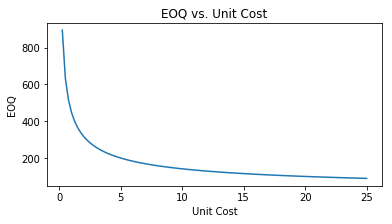

In [6]:


annual_demand = 1000
order_cost = 25

EOQ_list = []
unit_cost_list = []
for unit_cost in np.linspace(0.25, 25, 100):
    holding_cost = 0.25 * unit_cost
    EOQ_list.append(Compute_EOQ(annual_demand, order_cost, holding_cost))
    unit_cost_list.append(unit_cost)

fig, ax = plt.subplots(1, 1, figsize = (6,3))    
ax.plot(unit_cost_list, EOQ_list)
ax.set_xlabel('Unit Cost')
ax.set_ylabel('EOQ')
ax.set_title('EOQ vs. Unit Cost')
plt.show()

### Docstrings
<a id="Docstrings"> </a>

As we have been getting to know Python, we have noticed that most of the methods available in mature packages such as Numpy and Pandas allow us to view information on the methods using `<Shift> + <Tab>` in the Jupyter environment. This information is shown because the creators of the methods provide *docstrings* for defined functions.

Common pieces of information that are found in docstrings are: a description of the function or method, a description of the function or method's arguments, a description of what the function or method returns, a declaration for any package dependencies, and an example(s) of the function or method's use. Docstrings are defined within triple quotes immediately following the function or methods definition.

The following code block shows how we can add a docstring for our `Compute_EOQ` function.

[Back to Table of Contents](#Table_of_Contents)<br>

In [7]:
def Compute_EOQ(annual_demand, order_cost, holding_cost):
    '''
    This function computes the Economic Order Quantity (EOQ) 
    for a specified annual demand, ordering cost, and holding cost.
    
    Arguments:
    annual_demand - a numeric value representing the annual demand
    
    order_cost - a numeric value representing the ordering cost
    
    holding_cost - a numeric value representing the holding cost
    
    Returns:
    EOQ - a numeric value representing the Economic Order Quantity
    
    Dependencies:
    This function depends on the NumPy package
    
    Example:
    
    > Compute_EOQ(1000, 25, 2)
    
    158.11388300841898    
    
    '''
    import numpy as np
    
    EOQ = np.sqrt((2*annual_demand*order_cost)/holding_cost)
    
    return EOQ

The following code block shows how we can add a docstring for our `Compute_EOQ_TAC` function.

[Back to Table of Contents](#Table_of_Contents)<br>

In [8]:
def Compute_EOQ_TAC(EOQ, annual_demand, order_cost, holding_cost, unit_cost):
    '''
    This function computes the Total Annual Cost for a specified 
    Economic Order Quantity (EOQ), annual demand, ordering cost, 
    and holding cost.
    
    Arguments:
    EOQ - a numeric value representing the Economic Order Quantity
    
    annual_demand - a numeric value representing the annual demand
    
    order_cost - a numeric value representing the ordering cost
    
    holding_cost - a numeric value representing the holding cost
    
    unit_cost - a numeric value representing the unit cost
    
    Returns:
    TAC - a numeric value representing the Total Annual Cost
    
    Dependencies:
    No dependencies
    
    Example:
    
    > Compute_EOQ(1000, 25, 2)
    
    158.11388300841898   
    
    > Compute_EOQ_TAC(158.11388300841898, 1000, 25, 2, 8)
    
    8316.227766016838
    
    '''
    
    TAC = (annual_demand/EOQ)*order_cost + (EOQ/2)*holding_cost + unit_cost*annual_demand
    
    return TAC

## Defining and Using Custom Modules
<a id="Defining_Custom_Modules"> </a>

As we have seen, functions provide us with a simple means to create reusable block of code. However, suppose that we have a function that we would like to access in several programs. It would be quite a painful process to copy the function to each of our programs. Moreover, such copying of functions would greatly increase the length of our programs and potentially make them less interpretable.

Python allows us put function definitions in a file that can be imported into scripts as needed. Essentially, this is what is happening whenever we import a package such as Pandas or Numpy. In particular, such packages are just a collection of files that include function and object definitions, that we import for use. A *module* is a file containing Python definitions and statements. The file name is the module name with the suffix .py appended. 

In the current repository, there is a file named *inventory_functions.py* that contains the definitions for the `Compute_EOQ` and `Compute_EOQ_TAC` functions. The following code block uses the *import - as* statement to import our custom module and give it the alias `invf`. 

[Back to Table of Contents](#Table_of_Contents)<br>

In [9]:
import inventory_functions as invf

We can now use the functions defined in the module to perform computations. Even better, if we need to update one of the functions, we simply make the necessary changes in our module. The following code block replicates some of our previous computations using our imported module.

[Back to Table of Contents](#Table_of_Contents)<br>

In [10]:
annual_demand = 1000
order_cost = 25
holding_cost = 2
unit_cost = 8

EOQ = invf.Compute_EOQ(annual_demand, order_cost, holding_cost)
TAC = invf.Compute_EOQ_TAC(EOQ, annual_demand, order_cost, holding_cost,unit_cost)

print(f'The EOQ is {EOQ}, with a TRC of ${TAC}.')

The EOQ is 158.11388300841898, with a TRC of $8316.227766016838.
